### Проведение A/B-теста теста для интернет-магазина

**1.1  Задачи:**
1. Анализ гипотез и приоритизация:
    - Применить фреймворк ICE для приоритизации гипотез и отсортировать их по приоритету.
    - Применить фреймворк RICE для приоритизации гипотез и сравнить результаты с приоритетами по ICE.
    - Объяснить, как изменилась приоритизация гипотез при применении RICE вместо ICE.
2. Анализ A/B-теста:
    - Построить графики кумулятивной выручки и среднего чека по группам.
    - Вычислить статистическую значимость различий в среднем количестве заказов и среднем чеке между группами (сырые данные).
    - Построить графики кумулятивного среднего количества заказов на посетителя и относительного изменения среднего чека между группами.
    - Провести статистический анализ различий в среднем количестве заказов и среднем чеке между группами (очищенные данные).
    - Принять решение на основе результатов теста.

#### Импорт библиотек

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import scipy.stats as stats

Зададим единый стиль графиков

In [2]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

Зададим параметры отоброжения столбцов

In [3]:
pd.set_option('display.max_colwidth', None)

#### Загруска данных

In [4]:
try:
    hypothesis=pd.read_csv('/datasets/hypothesis.csv')
    orders=pd.read_csv('/datasets/orders.csv')
    visitors=pd.read_csv('/datasets/visitors.csv')
except:
    print("work in local")
    hypothesis= pd.read_csv('D:/study/dataset/ab_test_project10/hypothesis.csv')
    orders=pd.read_csv('D:/study/dataset/ab_test_project10/orders.csv')
    visitors=pd.read_csv('D:/study/dataset/ab_test_project10/visitors.csv')

work in local


#### Изучение общей информации по DataSet

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [10]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### Cтруктуры данных в данных (описание столбцов датасета)

**Структура данных в Гипотезах — hypothesis.csv**
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Структура данных в Заказах — orders.csv**
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

**Структура данных в Посетителях — visitors.csv**
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

Просмотрели основную информацию по dataframe **'hypothesis.csv','orders.csv','visitors.csv'**

1. **Выводы:** 
    1. Размеры датафремов 9,1197,62 строк соответственно. 
    2. Типы данных object, int, 
    3. Выявлена ошибка в типе данных в столбцах date df visitors и orders
    4. Название колонок не  соответствуют snace_case в df hypothesis.csv и orders
    
    
2. **План работ по предобработке данных:**
   1. Выполнить замену типов данных в  столбцах date
   2. Привести название колонок в  соответствие с snace_case

### Предобработке данных:

#### Приведение название колонок в  соответствие с snace_case 

In [11]:
new_cols_orders=['transaction_id','visitor_id','date','revenue','group']

In [12]:
old_cols_orders = orders.columns.tolist()

In [13]:
cols_change_dict_hypothesis = {k: v for k, v in zip(old_cols_orders, new_cols_orders)}

In [14]:
orders = orders.rename(columns=cols_change_dict_hypothesis)

In [15]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [16]:
new_cols_hypothesis=['hypothesis','reach','impact','confidence','efforts']

In [17]:
old_cols_hypothesis = hypothesis.columns.tolist()

In [18]:
cols_change_dict_hypothesis = {k: v for k, v in zip(old_cols_hypothesis, new_cols_hypothesis)}

In [19]:
hypothesis = hypothesis.rename(columns=cols_change_dict_hypothesis)

In [20]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


#### Изучение пропусков в Df

In [21]:
percent_orders= 100*(orders.isna().sum() / len(orders.index))

In [22]:
percent_orders

transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64

In [23]:
percent_visitors= 100*(visitors.isna().sum() / len(visitors.index))

In [24]:
percent_visitors

date        0.0
group       0.0
visitors    0.0
dtype: float64

Пропуски в данных отсутствуют 

#### Поиск дубликатов

In [25]:
visitors.duplicated().sum()

0

In [26]:
orders.duplicated().sum()

0

In [27]:
hypothesis.duplicated().sum()

0

Дубликаты в данных не выявлены

#### Изменение типа данных в столбцах date df visitors и orders

In [28]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [29]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [30]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


####  Проверка, есть ли в таблице orders пользователи, оказавшиеся одновременно в двух группах.

In [32]:
user_in_two_group=orders.groupby('visitor_id').agg({'group' : 'nunique'})\
.reset_index().query('group>1')['visitor_id'].unique()

In [33]:
len(user_in_two_group)

58

Найдено 58 пользователей в обоих групах, удалим их.

In [34]:
orders = orders.query('visitor_id not in @user_in_two_group')

In [35]:
orders.shape

(1016, 5)

#### Выводы:

1. Выполнить замену типов данных в  столбцах date
2. Привести название колонок в  соответствие с snace_case
3. Дубликаты в данных не выявлены
4. Пропуски в данных отсутствуют
5. Найдено 58 пользователей в таблице orders пользователи, оказавшиеся одновременно в двух группах. (были удалены)
6. Сохронено 1016 строк orders из 1197


###  Приоритизация гипотез

 #### Примените фреймворк ICE 

In [36]:
hypothesis['ICE']=round((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts'],2)

In [37]:
hypothesis.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


#### Примените фреймворк RICE 

In [38]:
hypothesis['RICE']=(hypothesis['impact']*hypothesis['confidence']\
                    *hypothesis['reach'])/hypothesis['efforts']

In [39]:
display(hypothesis.sort_values(by='RICE',ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


**Выводы:**
- При применении фреймворка RICE вместо ICE для приоритизации гипотез произошли изменения в их приоритетах. RICE включает в себя дополнительный параметр "охват" (Reach), который учитывает, сколько пользователей затронет изменение. 
- Сравним приоритеты гипотез, используя оба фреймворка:
    - При использовании ICE гипотеза 1 имела более высокий приоритет (16.2 сопостовимый с 16.2 у гипотезы 2).
    - Однако при применении RICE гипотеза 2 оказалась с более высоким приоритетом (112.0 против 16.2 у гипотезы 1).

- Это произошло из-за различий в параметре "охват" (Reach). Гипотеза 2 имеет значительно больший охват, так как она затронет всех посетителей, добавив форму на все страницы, в то время как гипотеза 1 имеет низкий охват, так как она касается только дней рождения клиентов. Поэтому RICE увеличил приоритет гипотезы 2 из-за большего ожидаемого воздействия на большее количество пользователей.
- Наиболее приоритетная гипотеза **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок****

### A/B-тест

#### Постройка графиков кумулятивной выручки по группам

создаем массив уникальных пар значений дат и групп теста

In [40]:
datesGroups = orders[['date', 'group']].drop_duplicates()

получаем агрегированные кумулятивные по дням данные о заказах 

In [41]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

In [42]:

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия

In [43]:

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [44]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [45]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [46]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A']\
[['date','revenue', 'orders','visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B']\
[['date','revenue', 'orders','visitors']]

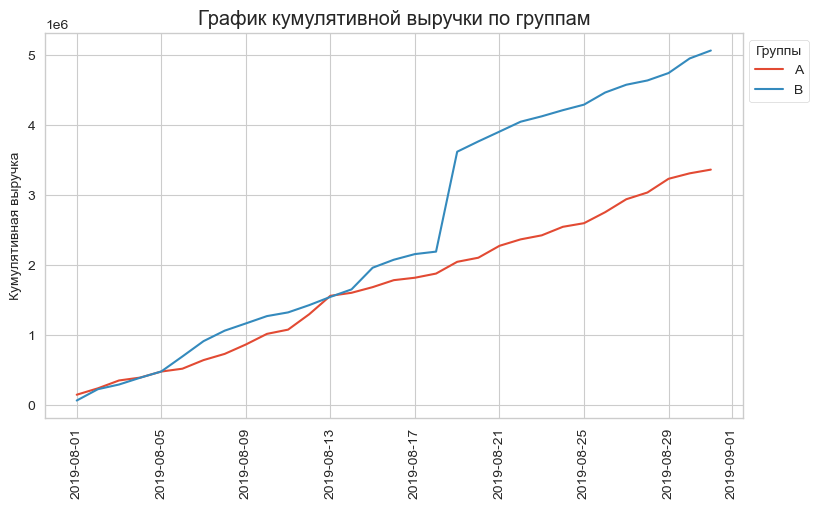

In [47]:
plt.figure(figsize=(9,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=90)
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Кумулятивная выручка')
plt.legend(title="Группы",loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

#####  Вывод:
Кумулятивная выручка группы А с 1 августа по 13 августа равномерно увеличивается с группой B. Но с 13 числа выручка группы B начинает расти быстрее группы A, также выручка группы B резко растет 18.08. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Необходимо провести доп. исследование

#### Постройка графика кумулятивного среднего чека по группам

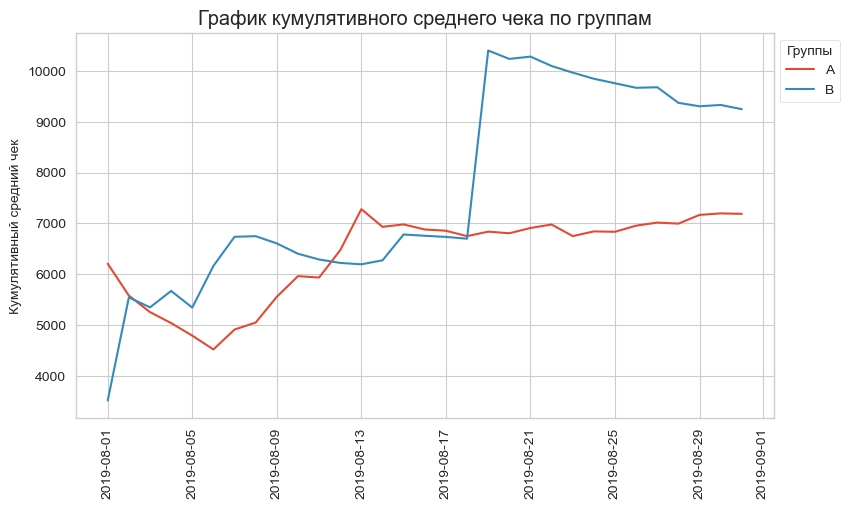

In [48]:
plt.figure(figsize=(9,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный средний чек')
plt.legend(title="Группы",loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

#####  Вывод:
Средний чек группы B значительно выше группы A в конце эксперимента. Так же средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает немного снижаться для группы B. Вероятнее всего данный процесс для группы B наблюдается из за крупных заказов (резкий всплеск на графике 18.08.19). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

####  Построение графика относительного изменения кумулятивного среднего чека группах

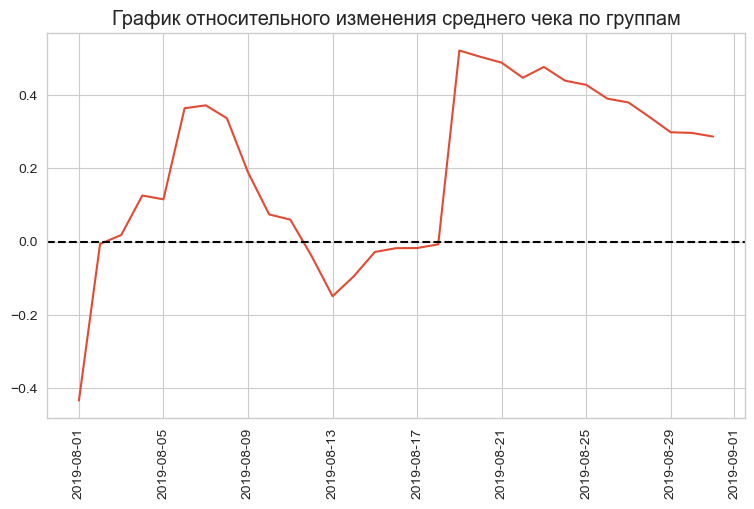

In [49]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(9,5))
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=90)
plt.title('График относительного изменения среднего чека по группам')
plt.show()


#####  Вывод:
В нескольких точках график различия между сегментами резко изменяется. Самое крупные изменения среднего чека по группам происходили 06.08.13 и 18.08.18. Это свидетельствует о крупные заказы и выбросах 18.08.18 , а 06.08.13 свидетельствует флуктуацией данных в начале теста

#### График кумулятивного среднего количества заказов на посетителя по группам.

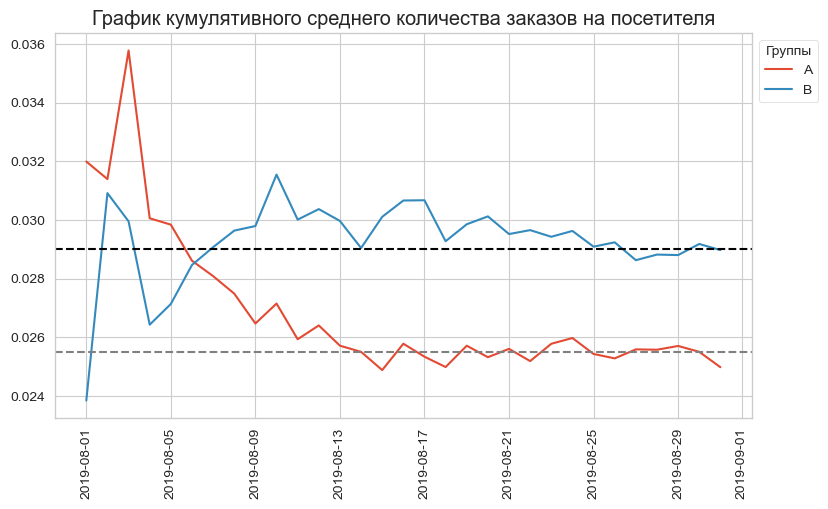

In [50]:
plt.figure(figsize=(9,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.legend(title="Группы",loc='upper left', bbox_to_anchor=(1, 1))
plt.axhline(y=0.029, color='black', linestyle='--')
plt.axhline(y=0.0255, color='gray', linestyle='--')
plt.show()

##### Выводы: 
Среднее количество заказов на посетителя в группе B значительно выше и стабилизировалось после 18.08.2019. Это позитивное изменение в поведении пользователей группы B может положительно сказаться на выручке и эффективности бизнеса

####  Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

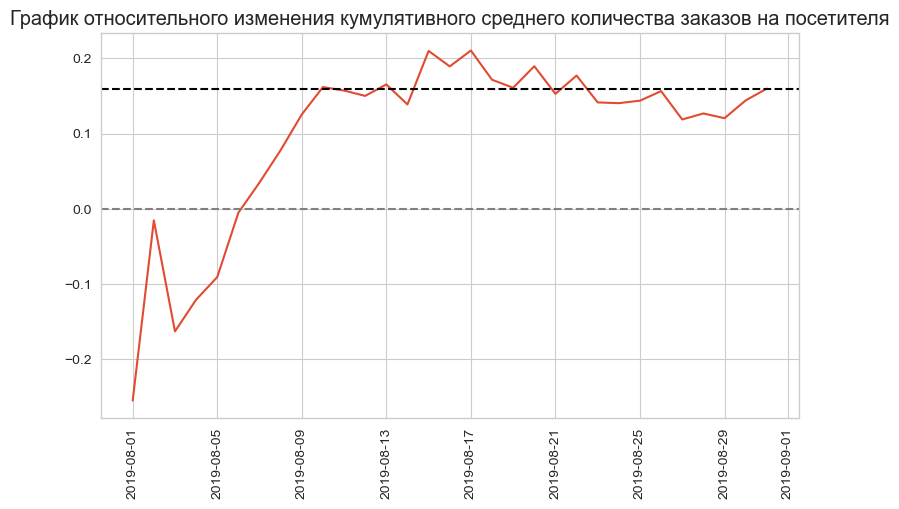

In [51]:
plt.figure(figsize=(9,5))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних покуплок на одного пользователя
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)

plt.xticks(rotation=90)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.axhline(y=0.159, color='black', linestyle='--')
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

#####  Выводы: 
График относительного изменения кумулятивного среднего количества заказов на посетителя стабилизировался на отметке примерно в 16% после 10.08.19. Это свидетельствует о том, что начальные колебания данных скорее всего были временными и не представляют существенного влияния на показатели.

#### Построение точечного графика количества заказов по пользователям.

In [52]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

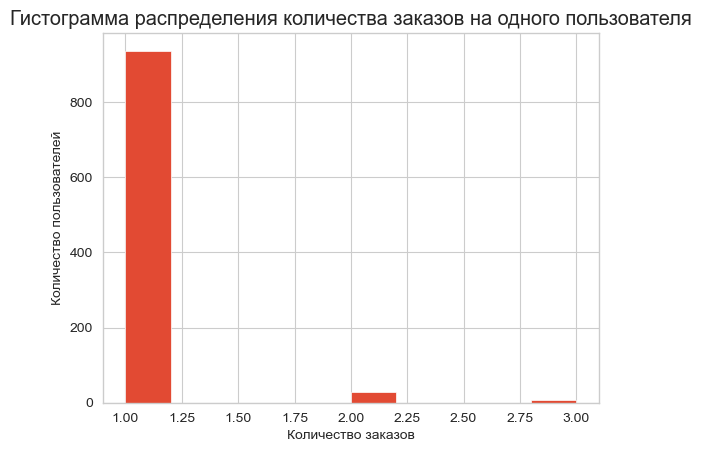

In [53]:
plt.hist(ordersByUsers['orders'])
plt.title('Гистограмма распределения количества заказов на одного пользователя')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')
plt.show()

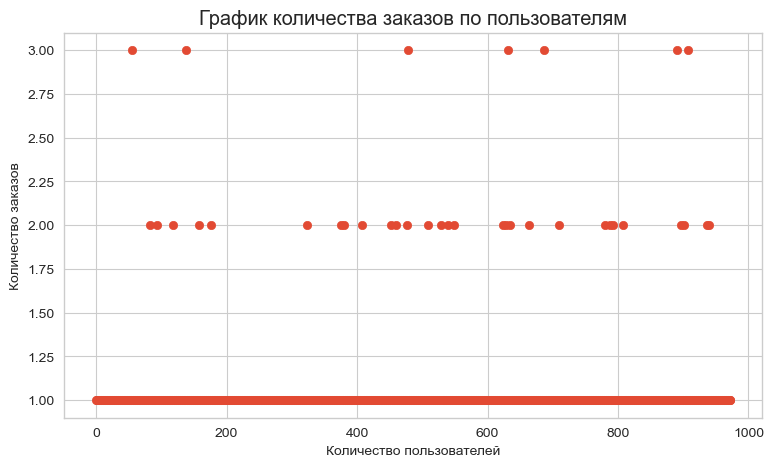

In [54]:
plt.figure(figsize=(9,5))
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.show()

Выводы подтверждаются: много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 

Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [55]:
print(np.percentile(ordersByUsers['orders'], [ 90,95, 99])) 

[1. 1. 2.]


# Вывод :
Не более 1% пользователей оформляли больше чем 2 заказа. И 10% пользователей заказывали только 1 раз.
Разумно выбрать 2  на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### Построение точечного график стоимостей заказов.

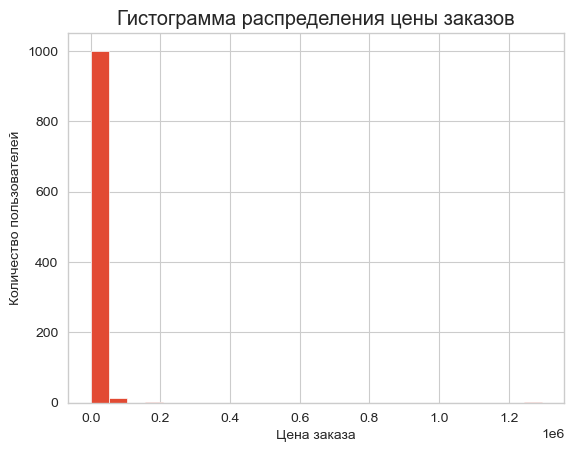

In [56]:
plt.hist(orders['revenue'],bins=25) 
plt.title('Гистограмма распределения цены заказов')
plt.ylabel('Количество пользователей')
plt.xlabel('Цена заказа')
plt.show()

In [57]:
x_values = pd.Series(range(0,len(orders['revenue'])))

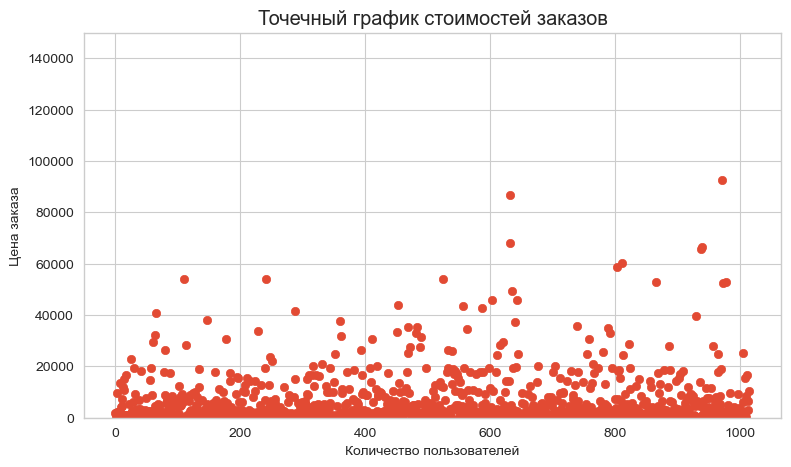

In [58]:
plt.figure(figsize=(9,5))
plt.ylim([0,150000])
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Цена заказа')
plt.show()

Есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 30000 рублей. Но для большей точности расчитаем 95-й и 99-й перцентили стоимости заказов.

In [59]:
print(np.percentile(orders['revenue'], [90,95, 99])) 

[17990. 26785. 53904.]


**Выводы:**
Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей.

#### Подготовка данных

In [60]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Создание групп пользователей, которые заказывали хотя бы 1

In [61]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Создание sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 

In [62]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange\
        (cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange\
(cumulativeData[cumulativeData['group'] == 'B']['visitors'].max()- len(ordersByUsersB['orders'])), name='orders')],axis=0) 

#### Формулировка гипотез:
1. **Гипотезы**
    - Нулевая гипотеза (H0): Статистически значимых различий в конверсии между группами нет.
    - Альтернативная гипотеза (H1): Конверсия в группе B статистически значимо выше, чем в группе A.
- **Уровень статистической значимости:** В данном анализе выбран уровень статистической значимости α (альфа) равный 0.05, что является стандартным порогом для многих статистических исследований.

- **Статистический тест (критерий):** Для проверки статистической значимости различий в конверсии между группами A и B был использован непараметрический тест Манна-Уитни (Mann-Whitney U-тест).


##### Расчет статистической значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [63]:
print('P-value =',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего группы B к конверсии группы A вавен',\
      "{0:.2f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value = 0.011
Относительный прирост среднего группы B к конверсии группы A вавен 0.16


**Выводы**
P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16%.
Осталось сравнить средние чеки по «сырым данным», а затем обе метрики ещё раз после удаления выбросов.

##### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

In [64]:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue']\
                                          , orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие среднего чека ''{0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']\
                       ['revenue'].mean()-1)) 

P-value = 0.829
Относительное различие среднего чека 0.29


**Вывод:**
P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами составляет 29 процентов. Вероятнее всего на это повлияли выбросы



##### Отчистка данных 

In [66]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'A']['visitors'].max()- len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
    ) 


##### Расчет статистической значимости  различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [67]:
print('P-value =','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.012
0.182


**Выводы:**
Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

##### Расчет статистической значимости  различий в среднем чеке заказа между группами по «очищенным» данным.

In [68]:
print('P-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.646
-0.048


 Выводы:
После удаления выбросов статистическая значимость различия среднего чека заказов между группами не обнаружена, и относительное различие составило всего - 5 процентов. Это говорит о том, что ранее выявленные различия в среднем чеке были связаны с аномальными значениями, и после их удаления различия стали незначительными и не имеют практической значимости.

### Выводы по A/B-тест
- **Приоритезации гипотез:** Выбор приоритетной гипотезы был основан на применении фреймворка RICE, который учитывает параметр "охват" (Reach). Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" получила наивысший приоритет благодаря своему значительному охвату, что позволит затронуть максимальное количество пользователей и потенциально принести большую пользу бизнесу.
-  **Динамика кумулятивной выручки:** Начиная с 13 августа и особенно 18 августа, выручка группы B стала значительно превосходить группу A. Это может свидетельствовать о всплесках числа заказов или появлении крупных заказов. Рекомендуется провести дополнительное исследование, чтобы выяснить природу этого изменения и исключить влияние выбросов.

- **Средний чек** группы B: В конце теста средний чек группы B оказался значительно выше, однако, он продолжает меняться. Вероятно, это связано с наличием крупных заказов, как указывает резкий всплеск 18 августа. Группе B требуется больше данных, чтобы установить стабильный средний чек.

- . **Изменения в различии между сегментами:** В нескольких точках график различия между группами резко изменяется, особенно 13 и 18 августа. Это может быть связано с крупными заказами и выбросами данных, что следует учесть при анализе результатов.

- **Поведение пользователей:** Почти все пользователи сделали не более 2 заказов, а 90% пользователей сделали только 1 заказ. Рекомендуется установить ограничение на число заказов на одного пользователя и удалить аномальных пользователей.

- **Выбросы в заказах:** Не более 5% заказов имеют стоимость выше 28000 рублей, и не более 1% - выше 58233.2 рублей. Рекомендуется удалить выбросы перед окончательным анализом.

- **Статистическая значимость:** Анализ "сырых данных" и 'чистых данных показывает статистически значимые различия в конверсии между группами A и B , но отсутствие различий в среднем чеке. Однако после удаления выбросов, статистическая значимость различия в среднем чеке исчезает.

- **Завершающее решение:** После всестороннего анализа данных и учитывая результаты, рекомендуется выполнить остановку A/B теста и закрепить победу за группой B. Анализ показал, что группа B демонстрирует статистически значимое увеличение конверсии по сравнению с группой A, как на "сырых данных", так и после удаления выбросов.Одновременно статистические тесты не обнаружили значимых различий в среднем чеке между группами после удаления выбросов. Таким образом, изменения, внесенные группой B, не только привели к увеличению конверсии, но и не отрицательно повлияли на средний чек.

При этом, важно продолжить мониторинг результатов после внедрения изменений и удостовериться, что улучшенная конверсия долгосрочно остается на уровне и приносит выгоду вашему бизнесу.